In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import time
import importlib

In [2]:
with open("./pkls/raw_hist_list.pkl", "rb") as f:
    raw_hist_list = pickle.load(f)[1:]# length 64
with open("./pkls/ignis_mitigator_info.pkl", "rb") as f:
    ignis_mitigator_info = pickle.load(f)
with open("./pkls/delta_mitigator_info.pkl", "rb") as f:
    delta_mitigator_info = pickle.load(f)
with open("./pkls/lnp_mitigator_info.pkl", "rb") as f:
    lnp_mitigator_info = pickle.load(f)
with open("./pkls/mooney01_mitigator_info.pkl", "rb") as f:
    mooney01_mitigator_info = pickle.load(f)
with open("./pkls/mooney001_mitigator_info.pkl", "rb") as f:
    mooney001_mitigator_info = pickle.load(f)
with open("./pkls/nation_lu_mitigator_info.pkl", "rb") as f:
    nation_lu_mitigator_info = pickle.load(f)
with open("./pkls/nation_bicgstab_mitigator_info.pkl", "rb") as f:
    nation_bicgstab_mitigator_info = pickle.load(f)
with open("./pkls/mthree_lu_mitigator_info.pkl", "rb") as f:
    mthree_lu_mitigator_info = pickle.load(f)
with open("./pkls/mthree_gmres_mitigator_info.pkl", "rb") as f:
    mthree_gmres_mitigator_info = pickle.load(f)

In [3]:
max_size = 65
max_length = 64
ignis_length = len(ignis_mitigator_info)
nation_bicgstab_length = len(nation_bicgstab_mitigator_info)
mooney01_length = len(mooney01_mitigator_info)
mooney001_length = len(mooney001_mitigator_info)

# Sums

In [4]:
def sum_of_hist(hist, shots=8192.0):
    s = 0
    for key, val in hist.items():
        s += val
    return s / shots

In [9]:
ignis_sum_of_x_s = [ignis_mitigator_info[i]["sum_of_x"] for i in range(ignis_length)]
delta_sum_of_x_s = [delta_mitigator_info[i]["sum_of_x"] for i in range(max_length)]
lnp_sum_of_x_s = [lnp_mitigator_info[i]["sum_of_x"] for i in range(max_length)]
mooney01_sum_of_x_s = [mooney01_mitigator_info[i]["sum_of_x"] for i in range(mooney01_length)]
mooney001_sum_of_x_s = [mooney001_mitigator_info[i]["sum_of_x"] for i in range(mooney001_length)]
nation_lu_sum_of_x_s = [nation_lu_mitigator_info[i]["sum_of_x"] for i in range(max_length)]
nation_bicgstab_sum_of_x_s = [nation_bicgstab_mitigator_info[i]["sum_of_x"] for i in range(nation_bicgstab_length)]
mthree_lu_sum_of_x_s = [mthree_lu_mitigator_info[i]["sum_of_x"] for i in range(max_length)]
mthree_gmres_sum_of_x_s = [mthree_gmres_mitigator_info[i]["sum_of_x"] for i in range(max_length)]

Text(0.5, 1.0, 'sums of mitigated vector elements\n (after inverse operation)')

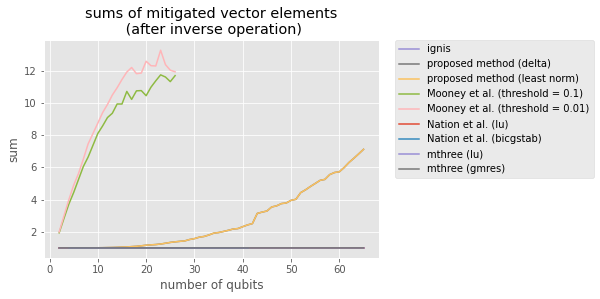

In [10]:
plt.clf()
plt.style.use('ggplot')
plt.plot(range(2, ignis_length + 2), ignis_sum_of_x_s, label="ignis", color="C2")
plt.plot(range(2, max_length + 2), delta_sum_of_x_s, label="proposed method (delta)", color="C3")
plt.plot(range(2, max_length + 2), lnp_sum_of_x_s, label="proposed method (least norm)", color="C4")
plt.plot(range(2, mooney01_length + 2), mooney01_sum_of_x_s, label="Mooney et al. (threshold = 0.1)", color="C5")
plt.plot(range(2, mooney001_length + 2), mooney001_sum_of_x_s, label="Mooney et al. (threshold = 0.01)", color="C6")
plt.plot(range(2, max_length + 2), nation_lu_sum_of_x_s, label="Nation et al. (lu)", color="C7")
plt.plot(range(2, nation_bicgstab_length + 2)[2:], nation_bicgstab_sum_of_x_s[2:], label="Nation et al. (bicgstab)", color="C8")
plt.plot(range(2, max_length + 2), mthree_lu_sum_of_x_s, label="mthree (lu)", color="C9")
plt.plot(range(2, max_length + 2), mthree_gmres_sum_of_x_s, label="mthree (gmres)", color="C10")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel("number of qubits")
plt.ylabel("sum")
plt.title("sums of mitigated vector elements\n (after inverse operation)")

In [11]:
ignis_sum_of_x_s = [ignis_mitigator_info[i]["sum_of_x"] for i in range(ignis_length)]
delta_sum_of_x_hat = [delta_mitigator_info[i]["sum_of_x_hat"] for i in range(max_length)]
lnp_sum_of_x_hat = [lnp_mitigator_info[i]["sum_of_x_hat"] for i in range(max_length)]
mooney01_sum_of_x_s = [mooney01_mitigator_info[i]["sum_of_x"] for i in range(mooney01_length)]
mooney001_sum_of_x_s = [mooney001_mitigator_info[i]["sum_of_x"] for i in range(mooney001_length)]
nation_lu_sum_of_x_s = [nation_lu_mitigator_info[i]["sum_of_x"] for i in range(max_length)]
nation_bicgstab_sum_of_x_s = [nation_bicgstab_mitigator_info[i]["sum_of_x"] for i in range(nation_bicgstab_length)]
mthree_lu_sum_of_x_s = [mthree_lu_mitigator_info[i]["sum_of_x"] for i in range(max_length)]
mthree_gmres_sum_of_x_s = [mthree_gmres_mitigator_info[i]["sum_of_x"] for i in range(max_length)]

Text(0.5, 1.0, 'sums of mitigated vector elements\n (after inverse operation)')

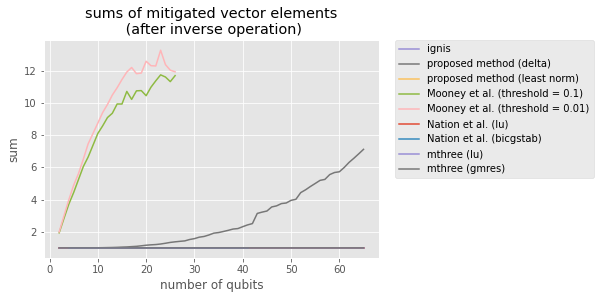

In [12]:
plt.clf()
plt.style.use('ggplot')
plt.plot(range(2, ignis_length + 2), ignis_sum_of_x_s, label="ignis", color="C2")
plt.plot(range(2, max_length + 2), delta_sum_of_x_hat, label="proposed method (delta)", color="C3")
plt.plot(range(2, max_length + 2), lnp_sum_of_x_hat, label="proposed method (least norm)", color="C4")
plt.plot(range(2, mooney01_length + 2), mooney01_sum_of_x_s, label="Mooney et al. (threshold = 0.1)", color="C5")
plt.plot(range(2, mooney001_length + 2), mooney001_sum_of_x_s, label="Mooney et al. (threshold = 0.01)", color="C6")
plt.plot(range(2, max_length + 2), nation_lu_sum_of_x_s, label="Nation et al. (lu)", color="C7")
plt.plot(range(2, nation_bicgstab_length + 2)[2:], nation_bicgstab_sum_of_x_s[2:], label="Nation et al. (bicgstab)", color="C8")
plt.plot(range(2, max_length + 2), mthree_lu_sum_of_x_s, label="mthree (lu)", color="C9")
plt.plot(range(2, max_length + 2), mthree_gmres_sum_of_x_s, label="mthree (gmres)", color="C10")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel("number of qubits")
plt.ylabel("sum")
plt.title("sums of mitigated vector elements\n (after inverse operation)")

Text(0.5, 1.0, 'sums of mitigated vector elements\n (after inverse operation)')

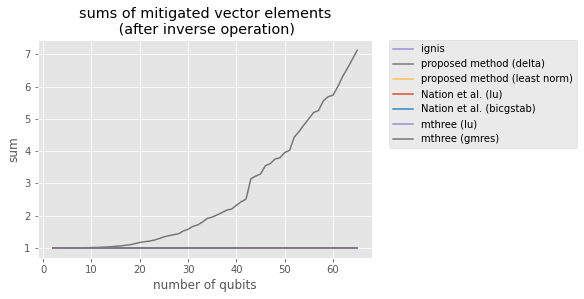

In [13]:
plt.clf()
plt.style.use('ggplot')
plt.plot(range(2, ignis_length + 2), ignis_sum_of_x_s, label="ignis", color="C2")
plt.plot(range(2, max_length + 2), delta_sum_of_x_hat, label="proposed method (delta)", color="C3")
plt.plot(range(2, max_length + 2), lnp_sum_of_x_hat, label="proposed method (least norm)", color="C4")
# plt.plot(range(2, mooney01_length + 2), mooney01_sum_of_x_s, label="Mooney et al. (threshold = 0.1)", color="C5")
# plt.plot(range(2, mooney001_length + 2), mooney001_sum_of_x_s, label="Mooney et al. (threshold = 0.01)", color="C6")
plt.plot(range(2, max_length + 2), nation_lu_sum_of_x_s, label="Nation et al. (lu)", color="C7")
plt.plot(range(2, nation_bicgstab_length + 2)[2:], nation_bicgstab_sum_of_x_s[2:], label="Nation et al. (bicgstab)", color="C8")
plt.plot(range(2, max_length + 2), mthree_lu_sum_of_x_s, label="mthree (lu)", color="C9")
plt.plot(range(2, max_length + 2), mthree_gmres_sum_of_x_s, label="mthree (gmres)", color="C10")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel("number of qubits")
plt.ylabel("sum")
plt.title("sums of mitigated vector elements\n (after inverse operation)")

In [ ]:
delta_inf

Text(0.5, 1.0, 'sums of mitigated vector elements\n (after inverse operation)')

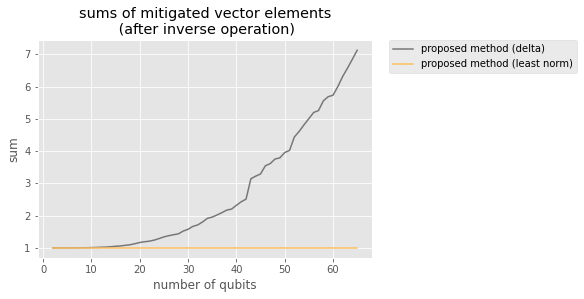

In [14]:
plt.clf()
plt.style.use('ggplot')
# plt.plot(range(2, ignis_length + 2), ignis_sum_of_x_s, label="ignis", color="C2")
plt.plot(range(2, max_length + 2), delta_sum_of_x_hat, label="proposed method (delta)", color="C3")
plt.plot(range(2, max_length + 2), lnp_sum_of_x_hat, label="proposed method (least norm)", color="C4")
# plt.plot(range(2, mooney01_length + 2), mooney01_sum_of_x_s, label="Mooney et al. (threshold = 0.1)", color="C5")
# plt.plot(range(2, mooney001_length + 2), mooney001_sum_of_x_s, label="Mooney et al. (threshold = 0.01)", color="C6")
# plt.plot(range(2, max_length + 2), nation_lu_sum_of_x_s, label="Nation et al. (lu)", color="C7")
# plt.plot(range(2, nation_bicgstab_length + 2)[2:], nation_bicgstab_sum_of_x_s[2:], label="Nation et al. (bicgstab)", color="C8")
# plt.plot(range(2, max_length + 2), mthree_lu_sum_of_x_s, label="mthree (lu)", color="C9")
# plt.plot(range(2, max_length + 2), mthree_gmres_sum_of_x_s, label="mthree (gmres)", color="C10")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel("number of qubits")
plt.ylabel("sum")
plt.title("sums of mitigated vector elements\n (after inverse operation)")

Text(0.5, 1.0, 'sums of mitigated vector elements\n (after sum correction)')

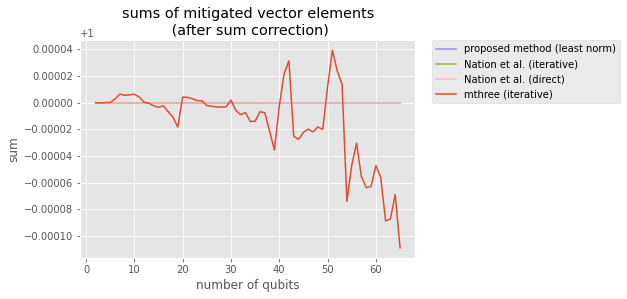

In [11]:
plt.clf()
plt.style.use('ggplot')
# plt.plot(range(2, ignis_length + 2), ignis_sum_of_x_s, label="ignis", color="C0")
# plt.plot(range(2, max_length + 2), delta_sum_of_x_hat, label="proposed method (delta)", color="C1")
plt.plot(range(2, max_length + 2), lnp_sum_of_x_hat, label="proposed method (least norm)", color="C2")
# plt.plot(range(2, mooney01_length + 2), mooney01_sum_of_x_s, label="Mooney et al. (threshold = 0.1)", color="C3")
# plt.plot(range(2, mooney001_length + 2), mooney001_sum_of_x_s, label="Mooney et al. (threshold = 0.01)", color="C4")
plt.plot(range(2, nation_bicgstab_length + 2)[2:], nation_bicgstab_sum_of_x_s[2:], label="Nation et al. (iterative)", color="C5")
plt.plot(range(2, max_length + 2), nation_lu_sum_of_x_s, label="Nation et al. (direct)", color="C6")
plt.plot(range(2, max_length + 2), mthree_gmres_sum_of_x_s, label="mthree (iterative)", color="C7")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel("number of qubits")
plt.ylabel("sum")
plt.title("sums of mitigated vector elements\n (after sum correction)")

Text(0.5, 1.0, 'sums of mitigated vector elements\n (after sum correction)')

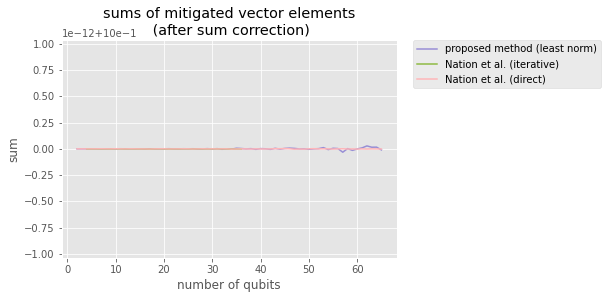

In [12]:
plt.clf()
plt.style.use('ggplot')
# plt.plot(range(2, ignis_length + 2), ignis_sum_of_x_s, label="ignis", color="C0")
# plt.plot(range(2, max_length + 2), delta_sum_of_x_hat, label="proposed method (delta)", color="C1")
plt.plot(range(2, max_length + 2), lnp_sum_of_x_hat, label="proposed method (least norm)", color="C2")
# plt.plot(range(2, mooney01_length + 2), mooney01_sum_of_x_s, label="Mooney et al. (threshold = 0.1)", color="C3")
# plt.plot(range(2, mooney001_length + 2), mooney001_sum_of_x_s, label="Mooney et al. (threshold = 0.01)", color="C4")
plt.plot(range(2, nation_bicgstab_length + 2)[2:], nation_bicgstab_sum_of_x_s[2:], label="Nation et al. (iterative)", color="C5")
plt.plot(range(2, max_length + 2), nation_lu_sum_of_x_s, label="Nation et al. (direct)", color="C6")
# plt.plot(range(2, max_length + 2), mthree_gmres_sum_of_x_s, label="mthree (iterative)", color="C7")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel("number of qubits")
plt.ylabel("sum")
plt.title("sums of mitigated vector elements\n (after sum correction)")